# ODE solvers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(pos):
    """pendulum?"""
    f = -m * 9.81 * np.sin(pos)
    return f

In [3]:
t_step = 0.001
no_steps = 5000
m=3
pendulum_length = 5

### Euler

In [4]:

x_euler = np.array([])
v_euler = np.array([])
x_euler = np.append(x_euler, 0)
v_euler = np.append(v_euler, 3)

for i in range(no_steps-1):
    x_next = x_euler[i] + (t_step*v_euler[i])
    v_next = v_euler[i] + (t_step*force(x_euler[i])/m)

    x_euler = np.append(x_euler, x_next)
    v_euler = np.append(v_euler, v_next)
    #print(force(x_euler[i]))

print(x_euler)

[0.         0.003      0.006      ... 0.89168778 0.8902439  0.8887924 ]


### Runge Kutta 2

In [5]:
x_runge = np.array([])
v_runge = np.array([])
x_runge = np.append(x_runge,0)
v_runge = np.append(v_runge,3)


for i in range(no_steps-1):
    x_next = x_runge[i] + (t_step*v_runge[i]) + (t_step**2 * force(x_runge[i])/m)
    v_next = v_runge[i] + (t_step*force(x_runge[i] + ((t_step/2)* v_runge[i]))/m)

    x_runge = np.append(x_runge, x_next)
    v_runge = np.append(v_runge, v_next)

print(x_runge)

[0.         0.003      0.00599996 ... 0.84497401 0.84347958 0.84197784]


### Runge Kutta 4

In [6]:
x_runge_4 = np.array([])
v_runge_4 = np.array([])
x_runge_4 = np.append(x_runge_4,0)
v_runge_4 = np.append(v_runge_4,3)

for i in range(no_steps-1):
    
    k1x = t_step * v_runge_4[i]
    k1v = t_step * force(x_runge_4[i])/m
    
    k2x = t_step * ( v_runge_4[i] + k1v/2)
    k2v = t_step * force(x_runge_4[i] + k1x/2)/m

    k3x = t_step * ( v_runge_4[i] + k2v/2)
    k3v = t_step * force(x_runge_4[i] + k2x/2)/m

    k4x = t_step * ( v_runge_4[i] + k3v)
    k4v = t_step * force(x_runge_4[i] + k3x)/m

    x_next = x_runge_4[i] + (k1x + 2*k2x + 2*k3x +k4x)/6
    v_next = v_runge_4[i] + (k1v + 2*k2v + 2*k3v +k4v)/6  

    x_runge_4 = np.append(x_runge_4, x_next)
    v_runge_4 = np.append(v_runge_4, v_next)

### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $ 

position half step  
$ x_{n+\frac{1}{2}} = x_n +\frac{1}{2}hv_n $  
$ v_{n+1} = v_n +h(x_{n+\frac{1}{2}}) $  
$ x_{n+1} = x_{n+\frac{1}{2}} +\frac{1}{2}hv_{n+1} $  




$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [7]:
x_verlet = np.array([])
v_verlet = np.array([])
x_verlet = np.append(x_verlet,0)
v_verlet = np.append(v_verlet,3)

for i in range(no_steps-1):
    a = force(x_verlet[i])/m
    v_next_half = v_verlet[i] + 0.5*(t_step*a)

    x_next_one = x_verlet[i] + t_step * v_next_half

    a = force(x_next_one)/m
    v_next_one = v_next_half + 0.5*(t_step*a)

    x_verlet = np.append(x_verlet, x_next_one)
    v_verlet = np.append(v_verlet, v_next_one)

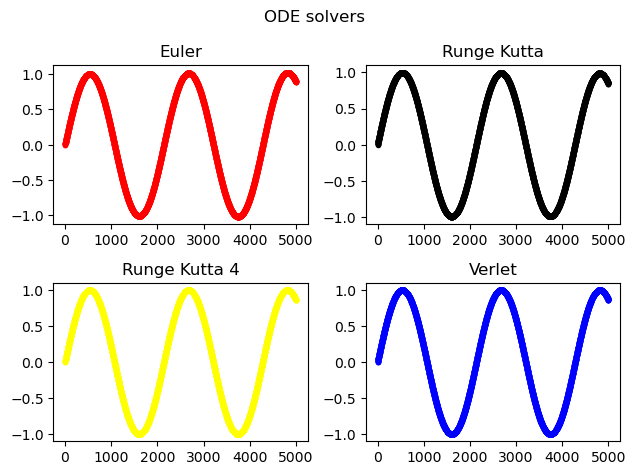

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ODE solvers')
ax1.set_title("Euler")
ax1.plot(np.linspace(0,no_steps, no_steps),x_euler, color ="red", linestyle = " ", marker = ".")
ax2.set_title("Runge Kutta")
ax2.plot(np.linspace(0,no_steps, no_steps),x_runge, color = "k", linestyle = " ", marker = ".")
ax3.set_title("Runge Kutta 4")
ax3.plot(np.linspace(0,no_steps, no_steps),x_runge_4, color = "yellow", linestyle = " ", marker = ".")
ax4.set_title("Verlet")
ax4.plot(np.linspace(0,no_steps, no_steps),x_verlet, color = "blue", linestyle = " ", marker = ".")
fig.tight_layout()

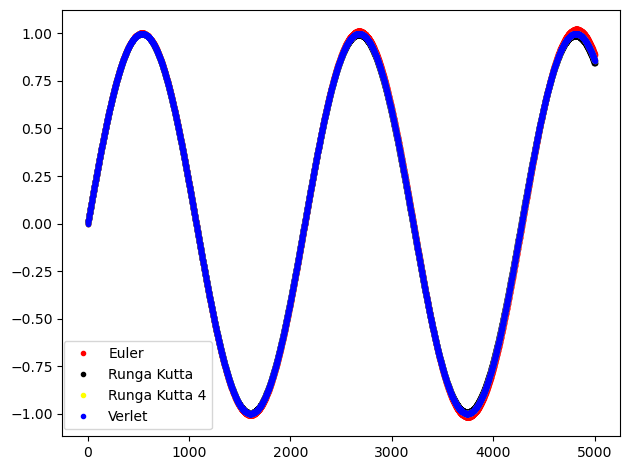

In [9]:
fig_combined = plt.figure()
ax_combined = fig_combined.add_subplot()
ax_combined.plot(np.linspace(0,no_steps, no_steps),x_euler, color ="red", linestyle = " ", marker = ".", label = "Euler")
ax_combined.plot(np.linspace(0,no_steps, no_steps),x_runge, color = "k", linestyle = " ", marker = ".", label = "Runga Kutta")
ax_combined.plot(np.linspace(0,no_steps, no_steps),x_runge_4, color = "yellow", linestyle = " ", marker = ".", label = "Runga Kutta 4")
ax_combined.plot(np.linspace(0,no_steps, no_steps),x_verlet, color = "blue", linestyle = " ", marker = ".", label = "Verlet")
ax_combined.legend(loc = "lower left",markerscale=1,bbox_to_anchor=(-0.01, 0))
fig_combined.tight_layout()

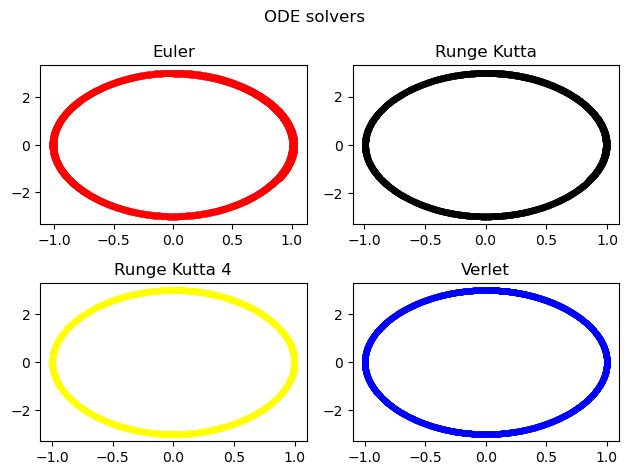

In [10]:
fig_oval, ((ax_oval_1, ax_oval_2), (ax_oval_3, ax_oval_4)) = plt.subplots(2, 2)
fig_oval.suptitle('ODE solvers')
ax_oval_1.set_title("Euler")
ax_oval_1.plot(x_euler, v_euler, color ="red", linestyle = " ", marker = ".")
ax_oval_2.set_title("Runge Kutta")
ax_oval_2.plot(x_runge, v_runge, color = "k", linestyle = " ", marker = ".")
ax_oval_3.set_title("Runge Kutta 4")
ax_oval_3.plot(x_runge_4, v_runge_4, color = "yellow", linestyle = " ", marker = ".")
ax_oval_4.set_title("Verlet")
ax_oval_4.plot(x_verlet, v_verlet, color = "blue", linestyle = " ", marker = ".")
fig_oval.tight_layout()

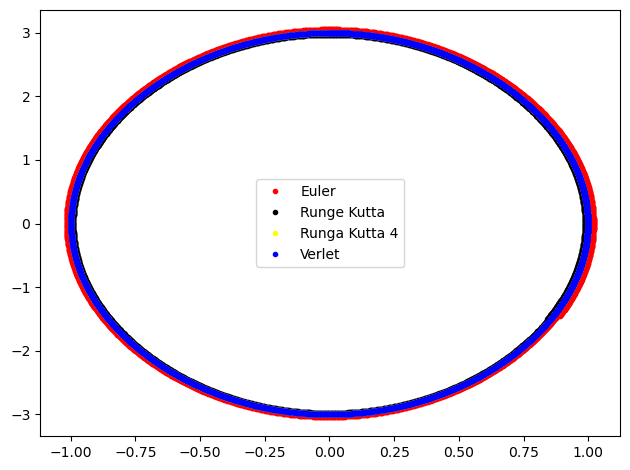

In [11]:
fig_oval = plt.figure()
ax_oval = fig_oval.add_subplot()
ax_oval.plot(x_euler,v_euler, color ="red", linestyle = " ", marker = ".", label = "Euler")
ax_oval.plot(x_runge,v_runge, color = "k", linestyle = " ", marker = ".", label = "Runge Kutta")
ax_oval.plot(x_runge_4,v_runge_4, color = "yellow", linestyle = " ", marker = ".", label = "Runga Kutta 4")
ax_oval.plot(x_verlet,v_verlet, color = "blue", linestyle = " ", marker = ".", label = "Verlet")
ax_oval.legend(loc = "center",markerscale=1)
fig_oval.tight_layout()